# Data Transformation with Pandas

- **Data transformation** refers to the process of converting and altering data from one format, structure, or representation to another. It involves various operations that can be applied to raw or source data to prepare it for analysis, modeling, or visualization. 

- Data transformation is a crucial step in the data preprocessing pipeline, and it is used for several purposes, including:
    - **Data Integration:** combining data from multiple sources or systems, such as aligning data types, units of measurement, or date formats.
    - **Feature Engineering:** create new features or variables from existing data, such as mathematical transformations or aggregations.
    - **Data Aggregation:** aggregate data at different levels, such as summing, averaging, or counting values within specified groups.
    - **Normalization and Scaling:** bring data of different scales into a common range, making it suitable for algorithms sensitive to the scale of variables, such as many machine learning models.
    - **Encoding Categorical Data:** transform textual or labeled data into numerical values, such as one-hot encoding, label encoding, or ordinal encoding.

In [1]:
import pandas as pd
import numpy as np

try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !pip install matplotlib
    import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/billionairs.csv")
df.shape

(2640, 35)

## 1. Dropping and renaming

### 1.1. Drop

Drop entire column: Remove rows or columns by specifying label names and corresponding axis.

In [3]:
# Add an extra column
df["extra"] = np.nan
"extra" in df.columns

True

In [4]:
# Drop column "extra"
df.drop(columns="extra", inplace=True) # KeyError raised if there is no column "extra"
"extra" in df.columns

False

Drop multiple columns

In [5]:
df["extra1"] = np.nan
df["extra2"] = np.nan
print("Before:", "extra1" in df.columns, "extra2" in df.columns)

df.drop(columns=["extra1", "extra2"], inplace=True)
print("After:", "extra1" in df.columns, "extra2" in df.columns)

Before: True True
After: False False


In [6]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [7]:
columns_to_drop = [
    'gross_tertiary_education_enrollment',
    'gross_primary_education_enrollment_country',
    'life_expectancy_country',
    'tax_revenue_country_country',
    'total_tax_rate_country',
]
df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'population_country', 'latitude_country',
       'longitude_country'],
      dtype='object')

Drop rows by index

In [8]:
df.tail(3)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,population_country,latitude_country,longitude_country
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,NaN,1963.0,12.0,18.0,125.08,2.9,"$19,910,000,000,000",1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,NaN,1952.0,8.0,21.0,125.08,2.9,"$19,910,000,000,000",1.397715e+09,35.861660,104.195397
2639,2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,...,NaN,1957.0,11.0,1.0,129.61,2.5,"$376,795,508,680",1.081166e+08,12.879721,121.774017


In [9]:
# Add new row
last_index = df.index[-1]
df.loc[last_index + 1] = df.iloc[last_index]
df.tail(3)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,population_country,latitude_country,longitude_country
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,NaN,1952.0,8.0,21.0,125.08,2.9,"$19,910,000,000,000",1.397715e+09,35.861660,104.195397
2639,2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,...,NaN,1957.0,11.0,1.0,129.61,2.5,"$376,795,508,680",1.081166e+08,12.879721,121.774017
2640,2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,...,NaN,1957.0,11.0,1.0,129.61,2.5,"$376,795,508,680",1.081166e+08,12.879721,121.774017


In [10]:
# Drop last row
df.drop(index=last_index+1, inplace=True)
df.tail(3)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,population_country,latitude_country,longitude_country
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,NaN,1963.0,12.0,18.0,125.08,2.9,"$19,910,000,000,000",1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,NaN,1952.0,8.0,21.0,125.08,2.9,"$19,910,000,000,000",1.397715e+09,35.861660,104.195397
2639,2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,...,NaN,1957.0,11.0,1.0,129.61,2.5,"$376,795,508,680",1.081166e+08,12.879721,121.774017


### 1.2. Rename

Rename 1 column

In [11]:
# add new column
df["old_col"] = np.nan
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'population_country', 'latitude_country',
       'longitude_country', 'old_col'],
      dtype='object')

In [12]:
df.rename(columns={"old_col": "new_col"}, inplace=True)
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'population_country', 'latitude_country',
       'longitude_country', 'new_col'],
      dtype='object')

Rename multiple columns

In [13]:
df["new_col_2"] = np.nan
df.rename(columns={
    "new_col": "newCol",
    "new_col_2": "newCol2"
}, inplace=True)
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'population_country', 'latitude_country',
       'longitude_country', 'newCol', 'newCol2'],
      dtype='object')

In [14]:
df.drop(columns=["newCol", "newCol2"], inplace=True)
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'population_country', 'latitude_country',
       'longitude_country'],
      dtype='object')

Rename index and multiple indices

In [15]:
df.index[:5]

Index([0, 1, 2, 3, 4], dtype='int64')

In [16]:
renamed_index = df.rename(index={0: "zero", 1: "one"})
renamed_index.index[:5]

Index(['zero', 'one', 2, 3, 4], dtype='object')

In [17]:
renamed_index.head(3)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,population_country,latitude_country,longitude_country
zero,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",67059887.0,46.227638,2.213749
one,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,South,1972.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891


Capitalize the row and column names with the `rename` method

In [18]:
df2 = df.set_index("personName")
df2.head(3)

,rank,finalWorth,category,age,country,city,source,industries,countryOfCitizenship,organization,...,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,population_country,latitude_country,longitude_country
personName,,,,,,,,,,,,,,,,,,,,,
Bernard Arnault & family,1,211000,Fashion & Retail,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",67059887.0,46.227638,2.213749
Elon Musk,2,180000,Automotive,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,South,1972.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891
Jeff Bezos,3,114000,Technology,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891


In [19]:
df2.rename(index=str.lower, columns=str.upper).head(3)

,RANK,FINALWORTH,CATEGORY,AGE,COUNTRY,CITY,SOURCE,INDUSTRIES,COUNTRYOFCITIZENSHIP,ORGANIZATION,...,RESIDENCESTATEREGION,BIRTHYEAR,BIRTHMONTH,BIRTHDAY,CPI_COUNTRY,CPI_CHANGE_COUNTRY,GDP_COUNTRY,POPULATION_COUNTRY,LATITUDE_COUNTRY,LONGITUDE_COUNTRY
personName,,,,,,,,,,,,,,,,,,,,,
bernard arnault & family,1,211000,Fashion & Retail,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",67059887.0,46.227638,2.213749
elon musk,2,180000,Automotive,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,South,1972.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891
jeff bezos,3,114000,Technology,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891


## 2. Grouping

- `groupby()`: Groups data based on one or more columns for aggregation.
- In Pandas, `groupby()` involve 3 steps:
    - **Splitting** the data into groups based on some criteria.
    - **Applying** a function to each group independently.
    - **Combining** the results into a data structure.
- Aggregation functions like `sum()`, `mean()`, `count()`, and custom aggregation using `agg()`.

In [20]:
df.groupby("country").sum()

,rank,finalWorth,category,personName,age,city,source,industries,countryOfCitizenship,organization,...,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,population_country,latitude_country,longitude_country
country,,,,,,,,,,,,,,,,,,,,,
Algeria,591,4600,Food & Beverage,Issad Rebrab & family,79.0,Algiers,Food,Food & Beverage,Algeria,0,...,0,1944.0,1.0,1.0,151.36,2.0,"$169,988,236,398",4.305305e+07,28.033886,1.659626
Andorra,1905,1500,Manufacturing,Carmen Thyssen,79.0,0,"Investments, art",Manufacturing,Spain,0,...,0,1944.0,4.0,23.0,0.00,0.0,"$3,154,057,987",7.714200e+04,42.506285,1.521801
Argentina,5287,11000,TechnologyEnergyDiversifiedReal Estate,Marcos GalperinGregorio Perez Companc & family...,253.0,Buenos AiresBuenos AiresBuenos AiresBuenos Aires,"E-commerceOil & gasAirports, investmentsReal e...",TechnologyEnergyDiversifiedReal Estate,ArgentinaArgentinaArgentinaArgentina,0,...,0,5816.0,29.0,44.0,931.00,214.0,"$449,663,446,954 $449,663,446,954 $449,663,446...",1.797548e+08,-153.664388,-254.466688
Armenia,2259,1200,Finance & Investments,Ruben Vardanyan & family,54.0,Erevan,Investment banking,Finance & Investments,Armenia,0,...,0,1969.0,5.0,25.0,129.18,1.4,"$13,672,802,158",2.957731e+06,40.069099,45.038189
Australia,59438,173500,Metals & MiningMetals & MiningReal EstateManuf...,Gina RinehartAndrew ForrestHarry TriguboffAnth...,2895.0,PerthPerthSydneyMelbourneSydneySydneyNew South...,MiningMiningReal estateManufacturingSoftwareSo...,Metals & MiningMetals & MiningReal EstateManuf...,AustraliaAustraliaAustraliaAustraliaAustraliaA...,Hancock ProspectingCanva,...,0,84094.0,292.0,638.0,5151.40,68.8,"$1,392,680,589,329 $1,392,680,589,329 $1,392,6...",1.107964e+09,-1086.799114,5752.330848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,100841,370700,DiversifiedManufacturingMetals & MiningFood & ...,Len BlavatnikJames RatcliffeLakshmi MittalChar...,5016.0,LondonLondonLondonLondonLondonLondonLondonGlou...,"Music, chemicalsChemicalsSteelHeinekenShipping...",DiversifiedManufacturingMetals & MiningFood & ...,United StatesUnited KingdomIndiaNetherlandsIsr...,ArcelorMittal (ADR)The Children's Investment F...,...,0,156824.0,470.0,937.0,9808.84,139.4,"$2,827,113,184,696 $2,827,113,184,696 $2,827,1...",5.480421e+09,4541.000182,-281.749786
United States,830727,4575100,AutomotiveTechnologyTechnologyFinance & Invest...,Elon MuskJeff BezosLarry EllisonWarren Buffett...,50749.0,AustinMedinaLanaiOmahaMedinaNew YorkHunts Poin...,"Tesla, SpaceXAmazonOracleBerkshire HathawayMic...",AutomotiveTechnologyTechnologyFinance & Invest...,United StatesUnited StatesUnited StatesUnited ...,TeslaAmazonOracleBerkshire Hathaway Inc. (Cl A...,...,SouthWestWestMidwestWestNortheastWestWestWestW...,1474593.0,4677.0,11281.0,88398.96,5655.0,"$21,427,700,000,000 $21,427,700,000,000 $21,42...",2.474926e+11,27966.040960,-72167.519814
Uruguay,1647,1800,Energy,Alejandro Bulgheroni,78.0,Manantiales,Oil & gas,Energy,Argentina,0,...,0,1945.0,11.0,1.0,202.92,7.9,"$56,045,912,952",3.461734e+06,-32.522779,-55.765835


In [21]:
# Top 5 countries with highest sum of finalWorth
df.groupby("country")["finalWorth"].sum().sort_values(ascending=False)[:5]

country
United States    4575100
China            1772500
India             628700
France            499500
Germany           462100
Name: finalWorth, dtype: int64

In [22]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'population_country', 'latitude_country',
       'longitude_country'],
      dtype='object')

In [23]:
# Count billionaires by gender for every category
gb = df.groupby(["category", "gender"]).count()
gb[:10]

rank  finalWorth  personName  age  country  \
category                   gender                                               
Automotive                 F          7           7           7    7        6   
                           M         66          66          66   65       65   
Construction & Engineering F          6           6           6    6        6   
                           M         39          39          39   38       36   
Diversified                F         29          29          29   27       29   
                           M        158         158         158  155      158   
Energy                     F         10          10          10    8       10   
                           M         90          90          90   89       90   
Fashion & Retail           F         39          39          39   37       38   
                           M        227         227         227  222      223   

                                   city  source  industries  \
category                   gender                             
Automotive                 F          6       7           7   
                           M         65      66          66   
Construction & Engineering F          6       6           6   
                           M         36      39          39   
Diversified                F         29      29          29   
                           M        156     158         158   
Energy                     F         10      10          10   
                           M         90      90          90   
Fashion & Retail           F         38      39          39   
                           M        220     227         227   

                                   countryOfCitizenship  organization  ...  \
category                   gender                                      ...   
Automotive                 F                          7             0  ...   
                           M                         66             3  ...   
Construction & Engineering F                          6             1  ...   
                           M                         39             3  ...   
Diversified                F                         29             1  ...   
                           M                        158             7  ...   
Energy                     F                         10             1  ...   
                           M                         90             6  ...   
Fashion & Retail           F                         39             6  ...   
                           M                        227            26  ...   

                                   residenceStateRegion  birthYear  \
category                   gender                                    
Automotive                 F                          1          7   
                           M                         11         63   
Construction & Engineering F                          1          6   
                           M                          4         38   
Diversified                F                          3         27   
                           M                         10        155   
Energy                     F                          4          8   
                           M                         31         89   
Fashion & Retail           F                         13         37   
                           M                         50        222   

                                   birthMonth  birthDay  cpi_country  \
category                   gender                                      
Automotive                 F                7         7            6   
                           M               63        63           64   
Construction & Engineering F                6         6            6   
                           M               38        38           36   
Diversified                F               27        27           29   
                       

In [24]:
gb.index[:5]

MultiIndex([(                'Automotive', 'F'),
            (                'Automotive', 'M'),
            ('Construction & Engineering', 'F'),
            ('Construction & Engineering', 'M'),
            (               'Diversified', 'F')],
           names=['category', 'gender'])

In [25]:
gb.loc[("Energy", "F"), "rank"]

# Equivalent: df[(df["category"]=="Energy") & (df["gender"]=="F")]["rank"].count()

10

In [26]:
# To get mean aggregation, extract columns with numeric data only
# Average finalWorth of billionaires by gender and whether they are selfMade or not
df[["selfMade", "gender", "finalWorth"]].groupby(["gender", "selfMade"]).mean()

finalWorth
gender selfMade             
F      False     5154.356846
       True      3104.166667
M      False     4894.889267
       True      4541.550117

## 3. Merging data from different tables

- `concat()`: Concatenation is used to stack DataFrames on top of each other (along rows) or side by side (along columns).
- Since `concat()` has no consideration for indexes, it is useful for combining DataFrames with the same columns or indexes.

In [27]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
pd.concat([df1, df2], axis=0) # On top of each other

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [28]:
pd.concat([df1, df2], axis=1) # Next to each other

,A,B,A,B
0,1,3,5,7
1,2,4,6,8


- Combine multiple dataframes

In [29]:
grades1 = pd.read_csv("../data/grades.csv")
grades2 = pd.read_csv("../data/grades2.csv")

concat = pd.concat([grades1, grades2], axis=0)
concat

,student_id,grades
0,MMF1,5
1,IT2,4
2,MMF3,5
3,EF4,3
0,MMF5,4
1,IT6,4
2,MMF7,3
3,EF8,3


In [30]:
concat.iloc[0]

student_id    MMF1
grades           5
Name: 0, dtype: object

In [31]:
pd.concat([grades1, grades2], axis=0, ignore_index=True)

,student_id,grades
0,MMF1,5
1,IT2,4
2,MMF3,5
3,EF4,3
4,MMF5,4
5,IT6,4
6,MMF7,3
7,EF8,3


- Concatenate from multiple dataset of different primary keys

In [32]:
grades = pd.read_csv("../data/grades.csv", index_col="student_id")
grades.head()

,grades
student_id,
MMF1,5
IT2,4
MMF3,5
EF4,3


In [33]:
profiles = pd.read_csv("../data/profiles.csv", index_col="student_id")
profiles.head()

,name,email
student_id,,
MMF1,Ana,ana@email.com
MMF3,Ivan,ivan12@email.ru
IT2,Gleb,gleb@email.com
EF4,Yuria,yr@email.ru


In [34]:
grades_profiles = pd.concat([profiles, grades], axis=1)
grades_profiles

,name,email,grades
student_id,,,
MMF1,Ana,ana@email.com,5
MMF3,Ivan,ivan12@email.ru,5
IT2,Gleb,gleb@email.com,4
EF4,Yuria,yr@email.ru,3


In [35]:
accounts = pd.read_csv("../data/accounts.csv", index_col="email")
accounts

,vk_accounts,youtube_accounts
email,,
ana@email.com,ana_vk,ana_yt
ivan12@email.ru,ivan_vk,NaN
gleb@email.com,gl_vk,NaN
yr@email.ru,yuria_vk,yuria_yt


In [36]:
pd.concat([grades, profiles, accounts], axis=1)

,grades,name,email,vk_accounts,youtube_accounts
MMF1,5.0,Ana,ana@email.com,NaN,NaN
IT2,4.0,Gleb,gleb@email.com,NaN,NaN
MMF3,5.0,Ivan,ivan12@email.ru,NaN,NaN
EF4,3.0,Yuria,yr@email.ru,NaN,NaN
ana@email.com,NaN,NaN,NaN,ana_vk,ana_yt
ivan12@email.ru,NaN,NaN,NaN,ivan_vk,NaN
gleb@email.com,NaN,NaN,NaN,gl_vk,NaN
yr@email.ru,NaN,NaN,NaN,yuria_vk,yuria_yt


In [37]:
reset_indexed_df = pd.concat([grades, profiles], axis=1).reset_index(drop=False).set_index("email")
reset_indexed_df

,student_id,grades,name
email,,,
ana@email.com,MMF1,5,Ana
gleb@email.com,IT2,4,Gleb
ivan12@email.ru,MMF3,5,Ivan
yr@email.ru,EF4,3,Yuria


In [38]:
pd.concat([reset_indexed_df, accounts], axis=1)

,student_id,grades,name,vk_accounts,youtube_accounts
email,,,,,
ana@email.com,MMF1,5,Ana,ana_vk,ana_yt
gleb@email.com,IT2,4,Gleb,gl_vk,NaN
ivan12@email.ru,MMF3,5,Ivan,ivan_vk,NaN
yr@email.ru,EF4,3,Yuria,yuria_vk,yuria_yt


- `join()`: Joins DataFrames using their index or a specified column. It is often used for aligning DataFrames with common indexes.
- `join()`: It is typically used when you have two DataFrames with a common key (index or column) and you want to merge them based on that key. It's often used for database-style joins.
- `join()`: It considers indexes.

In [39]:
grades_profiles

,name,email,grades
student_id,,,
MMF1,Ana,ana@email.com,5
MMF3,Ivan,ivan12@email.ru,5
IT2,Gleb,gleb@email.com,4
EF4,Yuria,yr@email.ru,3


In [40]:
accounts

,vk_accounts,youtube_accounts
email,,
ana@email.com,ana_vk,ana_yt
ivan12@email.ru,ivan_vk,NaN
gleb@email.com,gl_vk,NaN
yr@email.ru,yuria_vk,yuria_yt


In [41]:
accounts.join(grades_profiles, on="email")

,vk_accounts,youtube_accounts,name,email,grades
email,,,,,
ana@email.com,ana_vk,ana_yt,NaN,NaN,NaN
ivan12@email.ru,ivan_vk,NaN,NaN,NaN,NaN
gleb@email.com,gl_vk,NaN,NaN,NaN,NaN
yr@email.ru,yuria_vk,yuria_yt,NaN,NaN,NaN


In [42]:
grades_profiles.join(accounts, on="email")

,name,email,grades,vk_accounts,youtube_accounts
student_id,,,,,
MMF1,Ana,ana@email.com,5,ana_vk,ana_yt
MMF3,Ivan,ivan12@email.ru,5,ivan_vk,NaN
IT2,Gleb,gleb@email.com,4,gl_vk,NaN
EF4,Yuria,yr@email.ru,3,yuria_vk,yuria_yt


**EXERCISE**

1. Read data from `../data/sales1.csv` and `../data/sales2.csv` and combine them as 1 dataframe. You need to handle index of 2 dataframes so that the index of the final dataframe index ranges [0,2823].

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,M
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,M
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,S
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,M
2823,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,M


2. The current case of column names make them hard to read. Change case of all column names to `capitalize`.

Index(['Ordernumber', 'Quantityordered', 'Priceeach', 'Orderlinenumber',
       'Sales', 'Orderdate', 'Status', 'Qtr_id', 'Month_id', 'Year_id',
       'Productline', 'Msrp', 'Productcode', 'Customername', 'Phone',
       'Addressline1', 'Addressline2', 'City', 'State', 'Postalcode',
       'Country', 'Territory', 'Contactlastname', 'Contactfirstname',
       'Dealsize'],
      dtype='object')

2. Count missing values for each column

Ordernumber            0
Quantityordered        0
Priceeach              0
Orderlinenumber        0
Sales                  0
Orderdate              0
Status                 0
Qtr_id                 0
Month_id               0
Year_id                0
Productline            0
Msrp                   0
Productcode            0
Customername           0
Phone                  0
Addressline1           0
Addressline2        2522
City                   0
State               1486
Postalcode            76
Country                0
Territory           1075
Contactlastname        0
Contactfirstname       0
Dealsize               0
dtype: int64

4. Calculate percentage of missing data (over the total number of rows) in each columns that have missing values.
(You can use `for` loop for printing the output)

Addressline2    89.305949
State           52.620397
Postalcode       2.691218
Territory       38.066572
dtype: float64

5. Drop columns that have more than 50% of missing data

Index(['Addressline2', 'State'], dtype='object')


Index(['Ordernumber', 'Quantityordered', 'Priceeach', 'Orderlinenumber',
       'Sales', 'Orderdate', 'Status', 'Qtr_id', 'Month_id', 'Year_id',
       'Productline', 'Msrp', 'Productcode', 'Customername', 'Phone',
       'Addressline1', 'City', 'Postalcode', 'Country', 'Territory',
       'Contactlastname', 'Contactfirstname', 'Dealsize'],
      dtype='object')

6. Is there any duplicated rows? If yes, drop duplication.

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Customername,Phone,Addressline1,City,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,EMEA,Freyre,Diego,S
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,EMEA,Koskitalo,Pirkko,M
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,EMEA,Freyre,Diego,M
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,EMEA,Roulet,Annette,S
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,NaN,Yoshido,Juri,M


7. Check data consistency of columns `Status` and `Dealsize`. Make the values consistent if there is any inconsistence (values that mean the same thing but in different text)

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

array(['Small', 'Medium', 'Large', 'M', 'S', 'L'], dtype=object)

array(['Small', 'Medium', 'Large'], dtype=object)

8. Get volume of sales by `Dealsize`

Dealsize
Large     1302119.26
Medium    6087432.24
Small     2643077.35
Name: Sales, dtype: float64

9. Sum `Quantityordered` for each `Dealsize` in each `Status` of sales.

Dealsize  Status    
Large     Disputed        296
          In Process      153
          On Hold         373
          Resolved         45
          Shipped        6547
Medium    Cancelled      1247
          Disputed        184
          In Process      762
          On Hold        1097
          Resolved       1010
          Shipped       48219
Small     Cancelled       791
          Disputed        117
          In Process      575
          On Hold         409
          Resolved        605
          Shipped       36637
Name: Quantityordered, dtype: int64

10. Convert dtype of `Orderdate` to datetime object. See [here](https://strftime.org/) to select correct format. <br>
Note: If havin `-` in the format causes error, try removing it.

dtype('O')

dtype('<M8[ns]')

11. Save `sales` dataframe to file `../data/sales.csv`

## 4. Scaling and normalization

- Scaling and normalization are data preprocessing techniques used to adjust the range or distribution of numerical data.
- When your data have multiple features at different scales, it"s difficult to make comparisons between them. Let"s look at an example:

In [57]:
df4 = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "salary": [80000, 75000, 89000, 90000, 78000],
    "age": [30, 35, 36, 40, 29]
})
df4

,id,salary,age
0,1,80000,30
1,2,75000,35
2,3,89000,36
3,4,90000,40
4,5,78000,29


<Axes: >

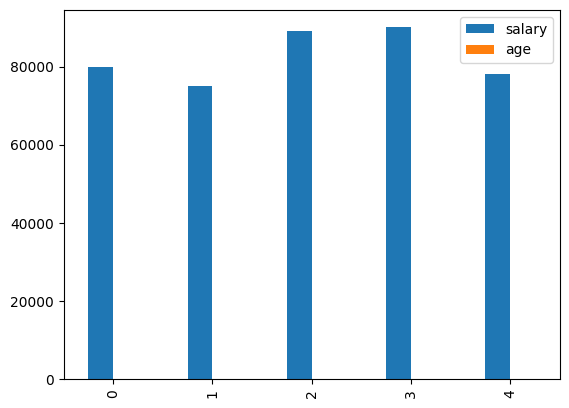

In [58]:
df4[["salary", "age"]].plot(kind="bar")
# Can you see columns "age" in this plot?

In [59]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

df4["scaled_salary"] = min_max_scaling(df4["salary"])
df4["scaled_age"] = min_max_scaling(df4["age"])

df4

,id,salary,age,scaled_salary,scaled_age
0,1,80000,30,0.333333,0.090909
1,2,75000,35,0.000000,0.545455
2,3,89000,36,0.933333,0.636364
3,4,90000,40,1.000000,1.000000
4,5,78000,29,0.200000,0.000000


<Axes: >

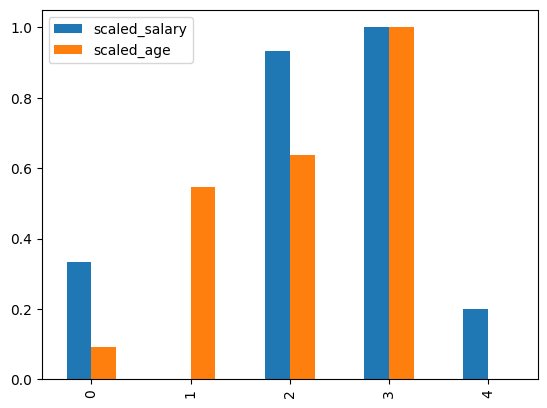

In [60]:
df4[["scaled_salary", "scaled_age"]].plot(kind="bar")

Moreover, some distanced-based machine learning algorithms are sensitive to scale. Therefore, we need to transform data to the same scale or same distribution.

The main difference between them:
- in **scaling**, you"re changing *the range of your data*, while
- in **normalization**, you"re changing *the shape of the distribution* of your data.

**Range vs Distribution?**

- Data range refers to the span or extent of values covered by a variable or dataset. It defines the minimum and maximum values that a variable can take. For example, Russian grading system range from 0-5, so the data range from 0-5. Meanwhile, in France, grades range from 0 - 20, in Japan, from 0 - 100, in Vietma, 0 - 10. To compare performance of students from different countries based on GPA, grades need to be scale to a same range.

- Data distribution describes how data is spread or organized across different values within a variable. It provides information about the shape, central tendency, and variability of data. Here"s an example of distribution of IQ scores.

<Axes: >

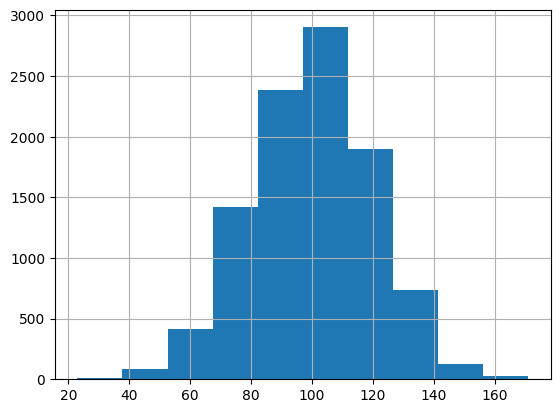

In [61]:
iq = np.random.normal(100, 20, size=10000).astype(np.uint8)
pd.Series(iq).hist()

Here"s an example of another distribution

<Axes: >

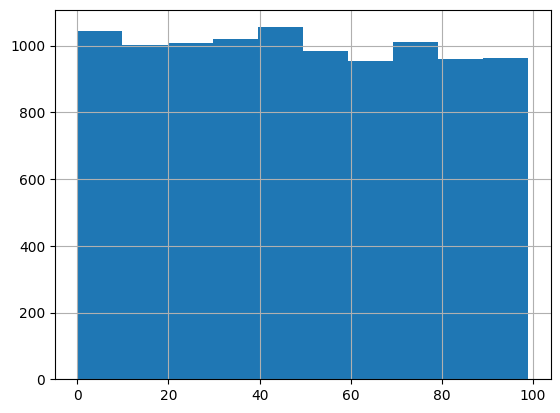

In [62]:
results = np.random.randint(0, 100, size=10000)
pd.Series(results).hist()

### 4.1. Scaling

- [Min-max scaling](https://en.wikipedia.org/wiki/Feature_scaling#Methods): scale data to range [0,1]

In [63]:
df4 = pd.DataFrame({"Before": [10, 12, 15, 60, 80, 99]})

# Min-Max Scaling
df_scaled = (df4 - df4.min()) / (df4.max() - df4.min())
df_scaled.rename(columns={"Before": "After"}, inplace=True)

pd.concat([df4, df_scaled], axis=1)

,Before,After
0,10,0.000000
1,12,0.022472
2,15,0.056180
3,60,0.561798
4,80,0.786517
5,99,1.000000


- [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function): scale data to range [0, 1], but pushing them to the extreme ends, where negative values closer to 0, positive values closer to 1, 0 value is 0.5. Usually see in binary classification.

In [64]:
df4 = pd.DataFrame({"Before": [10, 20, 30, 1, 0, -10, -4, -1]})

# Sigmoid Scaling
df_scaled = 1 / (1 + np.exp(-df4))
df_scaled.rename(columns={"Before": "After"}, inplace=True)

pd.concat([df4, df_scaled], axis=1)

,Before,After
0,10,0.999955
1,20,1.000000
2,30,1.000000
3,1,0.731059
4,0,0.500000
5,-10,0.000045
6,-4,0.017986
7,-1,0.268941


- Z-score Standardization

Z-score Standardization transforms features to have a mean of 0 and a standard deviation of 1. It is used when you want features to have similar scales and be centered around zero.

In [65]:
df4 = pd.DataFrame({"Before": [10, 20, 30, 1, 0, -10, -4, -1]})

# Z-Score Scaling (Standardization)
df_standardized = (df4 - df4.mean()) / df4.std()
df_standardized.rename(columns={"Before": "After"}, inplace=True)

pd.concat([df4, df_standardized], axis=1)

,Before,After
0,10,0.317597
1,20,1.064883
2,30,1.812169
3,1,-0.354961
4,0,-0.429689
5,-10,-1.176975
6,-4,-0.728604
7,-1,-0.504418


0      1.105417
1      1.290881
2      1.580532
3      1.349824
4      2.183044
         ...   
995    1.494348
996    1.119883
997    1.434887
998    1.306677
999    1.184175
Length: 1000, dtype: float64

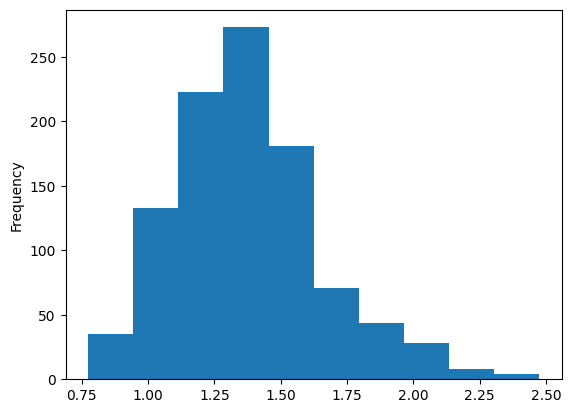

In [66]:
# Visualize
mu , sigma = 0.3, 0.2
normal_distributed = np.random.normal(mu, sigma, 1000)  
skewed_distributed = np.exp(normal_distributed)

s = pd.Series(skewed_distributed)
s.plot(kind="hist")
s

<Axes: ylabel='Frequency'>

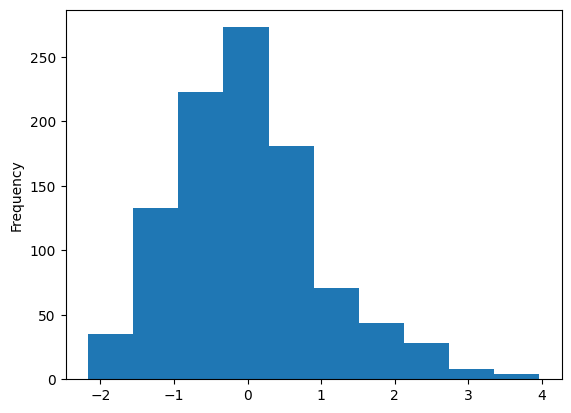

In [67]:
s2 = (s - s.mean()) / s.std()
s2.plot(kind="hist")

### 4.2. Normalization

Normalization methods that change the distribution of data are those that not only scale the data but also transform its distribution to make it more like a standard normal distribution (i.e., a distribution with a mean of 0 and a standard deviation of 1). These methods are typically used in situations where the data doesn"t follow a normal distribution, and you want to make it more Gaussian-like. 

- Log transform

array([[<Axes: title={'center': 'Before'}>]], dtype=object)

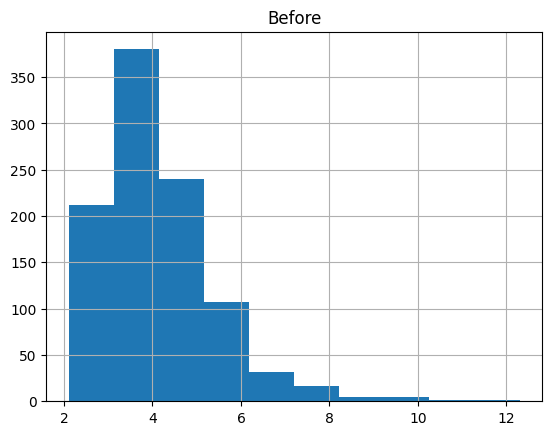

In [68]:
# Create a right-skewed distribution
mu, sigma = 0.3, 0.2
normal_distributed = np.random.normal(mu, sigma, 1000)  
rskewed_distributed = np.exp(np.exp(normal_distributed))
pd.DataFrame(rskewed_distributed, columns=["Before"]).hist()

array([[<Axes: title={'center': 'After'}>]], dtype=object)

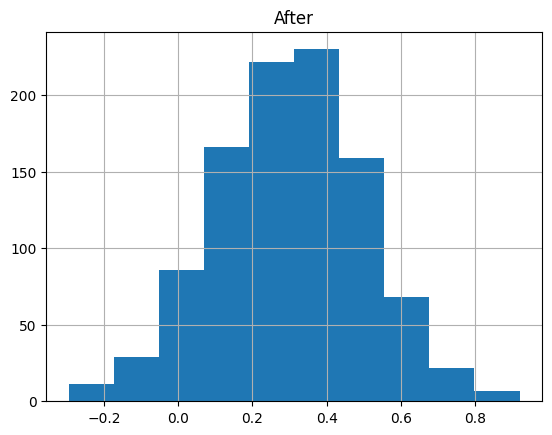

In [69]:
normalized = np.log(np.log(rskewed_distributed))
pd.DataFrame(normalized, columns=["After"]).hist()

- Exponential transform

/var/folders/s5/bwng7ztn4r10vbl4dl51sp_w0000gn/T/ipykernel_7041/936556702.py:4: RuntimeWarning: invalid value encountered in log
  lskewed_distributed = np.log(normal_distributed)


array([[<Axes: title={'center': 'Before'}>]], dtype=object)

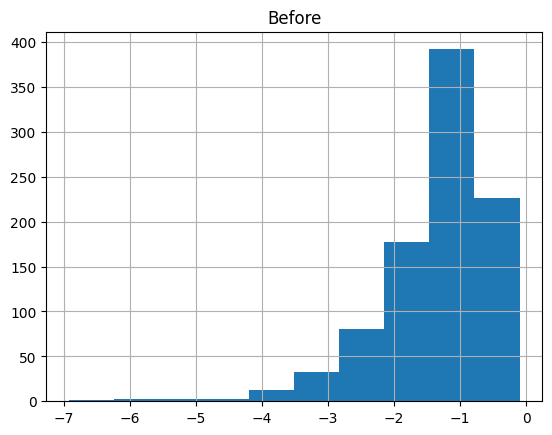

In [70]:
# Create a left-skewed distribution
mu, sigma = 0.3, 0.2
normal_distributed = np.random.normal(mu, sigma, 1000)  
lskewed_distributed = np.log(normal_distributed)
pd.DataFrame(lskewed_distributed, columns=["Before"]).hist()

array([[<Axes: title={'center': 'After'}>]], dtype=object)

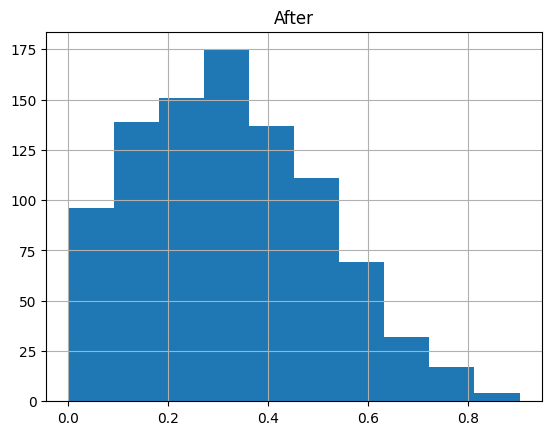

In [71]:
normalized = np.exp(lskewed_distributed)
pd.DataFrame(normalized, columns=["After"]).hist()

## 5. One-hot encoding

**One-Hot Encoding**, also known as binary encoding or dummy encoding, is a data preprocessing technique used to convert categorical or nominal data into a binary format that can be used in machine learning and statistical modeling. It"s particularly useful when dealing with categorical variables in datasets.

**How It Works**:
1. For each unique category in a categorical variable, one-hot encoding creates a new binary column (binary attribute) in the dataset.
2. In this new column, a "1" indicates the presence of a specific category, and "0" represents the absence of that category.
3. Each binary column is mutually exclusive, meaning only one of them can have a "1" for each row, representing the category for that observation.

**Example**:
Consider a dataset with a "Color" column that contains categorical values like "Red," "Green," and "Blue." One-hot encoding would create three binary columns: "Color_Red," "Color_Green," and "Color_Blue." For each row, the appropriate column is set to "1" to represent the color of that observation, while the other color columns are set to "0."

**Advantages**:
1. Allows the inclusion of categorical data in machine learning models that require numerical input, such as linear regression and decision trees.
2. Prevents the model from assigning unintended ordinal relationships to categories. For example, if "Red" is encoded as 1, "Green" as 2, and "Blue" as 3, the model might incorrectly assume that "Blue" is "greater" than "Red" because of the numerical encoding.

**Challenges and Considerations**:
1. **Increased Dimensionality**: One-hot encoding can significantly increase the dimensionality of the dataset, especially when dealing with variables with many unique categories.
2. **Sparse Data**: The resulting one-hot encoded matrix is often sparse, with many "0" values and relatively few "1" values. This can be memory-intensive.
3. **Multicollinearity**: Since the one-hot encoded columns are mutually exclusive, they are highly correlated. This can lead to multicollinearity issues in some models, such as linear regression. To mitigate this, one column is usually dropped as a reference category.

In [72]:
print(df["gender"].unique())
pd.get_dummies(df, columns=["gender"]).head()

['M' 'F']


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,population_country,latitude_country,longitude_country,gender_F,gender_M
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,3.0,5.0,110.05,1.1,"$2,715,518,274,227",67059887.0,46.227638,2.213749,False,True
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,6.0,28.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891,False,True
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,1.0,12.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891,False,True
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,8.0,17.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891,False,True
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,8.0,30.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891,False,True


- Add a prefix

In [73]:
pd.get_dummies(df, columns=["gender"], prefix="GENDER").head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,population_country,latitude_country,longitude_country,GENDER_F,GENDER_M
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,3.0,5.0,110.05,1.1,"$2,715,518,274,227",67059887.0,46.227638,2.213749,False,True
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,6.0,28.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891,False,True
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,1.0,12.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891,False,True
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,8.0,17.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891,False,True
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,8.0,30.0,117.24,7.5,"$21,427,700,000,000",328239523.0,37.090240,-95.712891,False,True


**EXERCISE**